Disclaimer: Let erop dit is een groepsopdracht van studenten en geen financieel advies.

# Case 2 groepsopdracht bloganalyse
In deze blog wordt gekeken wat voor effecten de interne en externe factoren hebben op de cryptomarkt.

## Inleiding
* Externe markt
* Interne markt

#### Benodigde installaties.

In [38]:
!pip install tweepy
!pip install textblob
!pip install matplotlib
!pip install tweepy
!pip install textblob
!pip install matplotlib
!pip install pytrends
!pip install seaborn
!pip install jsonschema
!pip install cbpro
!pip install pip --upgrade

SyntaxError: invalid syntax (<ipython-input-38-cc7ede1d0ea0>, line 11)

## Importeren van modules

#### Hieronder hebben wij gebruik gemaakt van textblob, sys, tweepy, csv, re en matplotlib

In [22]:
from ipywidgets import interact
from textblob import TextBlob
import os,sys,tweepy,csv,re
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import nbinteract as nbi
import seaborn as sns
from pytrends.request import TrendReq
import cbpro
import pandas as pd

In [7]:
# This function generates the x-values
def categories(n):
    return list('abcdefg')[:n]

# This function generates the y-values (heights of bars)
# The y response function always takes in the x-values as its
# first argument
def offset_y(xs, offset):
    num_categories = len(xs)
    return np.arange(num_categories) + offset

# Each argument of the response functions is passed in as a keyword
# argument to `nbi.bar` in the same format as `interact`
nbi.bar(categories, offset_y, n=(1, 7), offset=(0, 10))

# Sentiment Twitter in verband met cryptocurrencies

#### Hieronder hebben wij de API van twitter: tweepy, geinstalleerd. Daarbij hebben we de package textblob geinstalleerd, dit is een package die bijvoorbeeld het sentiment van bepaalde woorden kan analyseren. Denk hierbij aan woorden die worden gerefereerd aan positiviteit en woorden die referen naar negativiteit.

#### Voer hier de crypto in die je wilt analyseren

In [26]:
dropdown = widgets.Dropdown(
options = ['BTC', 'ETH', 'LINK', 'XTZ'], layout={'width': 'max-content'}, description='Crypto: ')

dropdown

Dropdown(description='Crypto: ', layout=Layout(width='max-content'), options=('BTC', 'ETH', 'LINK', 'XTZ'), va…

#### Voer hier in hoeveel tweets je wilt analyseren van de eerder opgegeven crypto

In [33]:
slider = widgets.IntSlider(
value = 0,
min = 0,
max = 500,
step = 10,
description = 'slider',
orientation = 'horizontal')

slider

IntSlider(value=0, description='slider', max=500, step=10)

#### Voer hieronder de cryptocurrency in die je wilt analyseren en hoeveel tweets je wilt analyseren (max. 500) van de afgelopen 7 dagen.

In [34]:
searchTerm = dropdown.value 
NoOfTerms = slider.value

In [35]:
searchTerm

'BTC'

In [36]:
NoOfTerms

150

#### Voor het analyseren van de zoekopdracht gebruiken we de volgende code

Hoe mensen reageren op BTC bij het analyseren van 150 tweets.

Algemeen Rapport: 
Zwak Positief

Gedetailleerd Rapport: 
9.333333333333334% mensen denken er positief over
19.333333333333332% mensen denken er zwak positief over
3.3333333333333335% mensen denken er sterk positief over
4.666666666666667% mensen denken er negatief over
10.0% mensen denken er sterk negatief over
0.6666666666666666% mensen denken er sterk negatief over
52.666666666666664% mensen denken er neutraal over


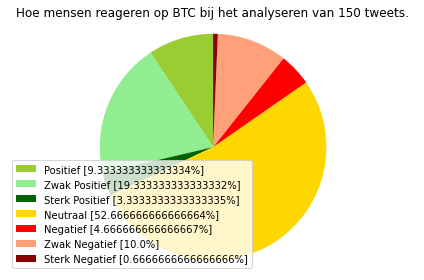

In [37]:
class SentimentAnalysis:
    def __init__(self):
        self.tweets = []
        self.tweetText = []
    def DownloadData(self):
        # Met de consumer_key, consumer_secret, acces_token en access_token_secret authentiseer je jezelf aan de API van twitter
        consumer_key = 'lNY0nv6NSzIMtggqwlXFa4BWX'
        consumer_secret = 'lLbxLS6wubvUWXerCGbbcm7jJFunBFESUSbbeIRxgu1DolDHAM'
        access_token = '211948218-Zl7dDiD4CwyqgXG6WG2VqauPhkiVzBHUbNKNQA0q'
        access_token_secret = 'uyCbQsjf5fnWSXGB43w2OgrJ9pXrHGc8qk2kn4F7S1YSF'
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        api = tweepy.API(auth)
        
        # Met de code hieronder wordt gezocht naar tweets (searchterm) en het aantal tweets (NoOfTerms)
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)
        # Om de data toe te voegen aan een csvFile wordt de functie open gebruikt
        csvFile = open('result.csv', 'a')
        # Gebruik csvWriter
        csvWriter = csv.writer(csvFile)
        # Variabele zijn hieronder aangemaakt
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0
        # ophalen van tweets
        for tweet in self.tweets:
            # Opslaan van de tweets om te gebruiken in csvFile via utf-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # analyse met TextBlob
            analysis = TextBlob(tweet.text)
            # polarity uitprinten
            polarity += analysis.sentiment.polarity  # toevoegen van polarity om het gemiddelde sentiment te krijgen
            if (analysis.sentiment.polarity == 0):  # reactie toevoegen om later het gemiddelde sentiment hiervan op te halen
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1
                

        # opzoeken van het gemiddelde op hoe mensen reageren op in dit geval bepaalde cryptocurrencies
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)
        # vinden van gemiddelde sentiment
        polarity = polarity / NoOfTerms
        # uitprinten data
        print("Hoe mensen reageren op " + searchTerm + " bij het analyseren van " + str(NoOfTerms) + " tweets.")
        print()
        print("Algemeen Rapport: ")
        if (polarity == 0):
            print("Neutraal")
        elif (polarity > 0 and polarity <= 0.3):
            print("Zwak Positief")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positief")
        elif (polarity > 0.6 and polarity <= 1):
            print("Sterk Positief")
        elif (polarity > -0.3 and polarity <= 0):
            print("Zwak Negatief")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negatief")
        elif (polarity > -1 and polarity <= -0.6):
            print("Sterk Negatief")
        print()
        print("Gedetailleerd Rapport: ")
        print(str(positive) + "% mensen denken er positief over")
        print(str(wpositive) + "% mensen denken er zwak positief over")
        print(str(spositive) + "% mensen denken er sterk positief over")
        print(str(negative) + "% mensen denken er negatief over")
        print(str(wnegative) + "% mensen denken er sterk negatief over")
        print(str(snegative) + "% mensen denken er sterk negatief over")
        print(str(neutral) + "% mensen denken er neutraal over")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Hiermee verwijderen we linkjes en speciale tekens zodat wij schone data krijgen
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # Deze functie berekent het percentage en zet het antwoord op 2 decimalen.
    def percentage(self, part, whole):
        return 100 * float(part) / float(whole)
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positief [' + str(positive) + '%]', 'Zwak Positief [' + str(wpositive) + '%]','Sterk Positief [' + str(spositive) + '%]', 'Neutraal [' + str(neutral) + '%]',
                  'Negatief [' + str(negative) + '%]', 'Zwak Negatief [' + str(wnegative) + '%]', 'Sterk Negatief [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title("Hoe mensen reageren op " + searchTerm + " bij het analyseren van " + str(NoOfTerms) + " tweets.")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()


# onderstaande code runt alle def's
if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()

# Invloed google searches op de cryptomarkt

### Allereerst wordt een variabele gemaakt die de zoekresultaten van google importeert

In [5]:
pytrend = TrendReq()

### Vervolgens kunnen we even kort als voorbeeld een functie maken die de interresse per regio laat zien van de term Crypto

In [6]:
pytrend.build_payload(kw_list=['Crypto'])
df = pytrend.interest_by_region()
df.sort_values(by='Crypto', ascending=False)

,Crypto
geoName,
Netherlands,100
Slovenia,79
Belgium,51
St. Helena,50
Singapore,46
...,...
Haiti,0
Heard & McDonald Islands,0
Honduras,0


# Analyseren data ontvangen uit Google

#### Vervolgens gaan we onze gekozen munten LINK, BTC, ETH, XTZ testen op hun gerelateerde keywoorden, zodat we kunnen zien of de zoektermen niet worden verward met andere begrippen

In [7]:
pytrend.build_payload(kw_list=['LINK'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                     query  value
0                 tp link    100
1                      tp     97
2                 link in     90
3           link download     42
4           link whatsapp     35
5               link card     31
6           facebook link     26
7             link aadhar     23
8            link youtube     21
9              chain link     19
10       link coin master     17
11             link login     17
12              html link     16
13               get link     16
14    whatsapp group link     14
15                link up     13
16           tp link wifi     13
17         tp link router     13
18                link tv     11
19             link zelda     11
20  coin master free link     11
21               red link     11
22        aadhar pan link     10
23            family link     10
24               pan card      9, 'rising':                                  query   value
0                     link coin master  136400
1               

In [8]:
pytrend.build_payload(kw_list=['BTC'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                query  value
0            binance    100
1              apple     97
2              loans     96
3                bmw     96
4               benz     95
5            btc usd     79
6         usd to btc     57
7          price btc     27
8            bitcoin     19
9        btc bitcoin     19
10           btc inr     14
11        btc to inr     12
12         1 btc usd     11
13      1 usd to btc     11
14           btc eur      8
15     btc usd price      8
16           eth btc      7
17    bitcoin to usd      6
18            up btc      5
19           btc gbp      5
20        btc in usd      5
21     bitcoin price      5
22          btc euro      4
23        btc result      4
24  btc to usd price      4, 'rising':                   query    value
0               binance  2581800
1                  benz   305600
2                 loans   108900
3              btc 2017    81700
4               eth usd    63250
5                   bmw    58800
6        

In [9]:
pytrend.build_payload(kw_list=['ETH'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':              query  value
0          usd eth    100
1          btc eth     73
2        eth price     69
3              btc     69
4       usd to eth     63
5       eth zurich     35
6       eth to btc     35
7         ethereum     34
8     ethereum eth     34
9          bitcoin     31
10         btc usd     26
11         eth eur     23
12      eth zürich     23
13      mining eth     20
14      btc to usd     17
15        eth coin     15
16         eth inr     14
17  eth calculator     14
18      eth wallet     13
19      eth to inr     12
20   eth usd price     11
21  eth university     10
22       btc price     10
23   bitcoin price     10
24        eth euro     10, 'rising':                    query   value
0                btc usd  342100
1                    xrp  117750
2                binance  114600
3                giá eth   83050
4         eth prediction   69750
5           eth hashrate   61000
6   eth price prediction   53600
7          coinmarketcap   5

In [10]:
pytrend.build_payload(kw_list=['XTZ'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':               query  value
0           xtz 125    100
1        xtz yamaha     77
2            yamaha     76
3           xtz 250     61
4          xtz moto     34
5           xtz 150     33
6    yamaha xtz 125     31
7        yamaha 125     31
8    xtz 250 yamaha     18
9        yamaha 250     17
10          660 xtz     16
11        motos xtz     16
12            motos     15
13       xtz lander     15
14            honda     14
15     moto xtz 125     14
16        honda xtz     14
17   yamaha 150 xtz     13
18           tenere     12
19          xtz 750     12
20       lander 250     11
21   xtz 250 lander     11
22      moto yamaha     10
23      xtz crosser      9
24  moto yamaha xtz      9, 'rising':                         query   value
0                    xtz 2019  198700
1                    xtz 2018  166450
2                xtz 250 2020   98000
3                xtz 250 2019   75400
4                   tezos xtz   59850
5                xtz 125 2018   59300


#### Hieruit is te zien dat de term van LINK veel wordt gebruikt voor linkes van websites etc. waardoor we deze term voor de google searches niet meenemen 

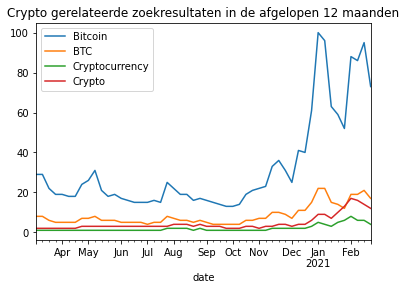

In [11]:
keywords = ['Bitcoin', 'BTC', 'Cryptocurrency', 'Crypto']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 12-m',
     geo='',
     gprop='')
data = pytrend.interest_over_time()
data= data.drop(labels=['isPartial'],axis='columns')
image = data.plot(title = 'Crypto gerelateerde zoekresultaten in de afgelopen 12 maanden')
fig = image.get_figure()
fig.savefig('figure.png')

#### In de bovenstaande grafiek zien we wat de zoekwaardes Bitcoin, BTC, Cryptocurrency en crypto hebben gedaan afgelopen 12 maanden.

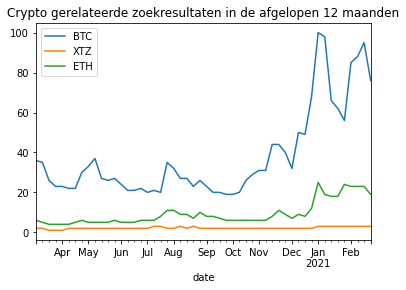

In [13]:
keywords = ['BTC', 'XTZ', 'ETH']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 12-m',
     geo='',
     gprop='')
data = pytrend.interest_over_time()
data= data.drop(labels=['isPartial'],axis='columns')
image = data.plot(title = 'Crypto gerelateerde zoekresultaten in de afgelopen 12 maanden')
fig = image.get_figure()
fig.savefig('figure.png')

Voor de waardes van BTC, XTZ en ETH is de afgelopen grafiek te zien, waaraan je ziet dat de zoektermen van Bitcoin gelijk stijgen en dalen met die van ETH.

# Conclusie

# Interne effecten op de markt

## het effect van Bitcoin op de munten

Om te beginnen importeren wij cbpro, dit is een package die ons de mogelijkheid geeft om de koers van de cryptos te kunnen ophalen, de huidige koers en de verleden koers.

Hiervoor maken wij een public client aan die de connectie met de API maakt.

In [24]:
public_client = cbpro.PublicClient()

Met de onderstaande code kunnen wij extra informatie achterhalen welke verschillende munten wij kunnen ophalen en wat de properties daarvan zijn.

In [25]:
currencies = public_client.get_currencies()
currencies

[{'id': 'ALGO',
  'name': 'Algorand',
  'min_size': '1',
  'status': 'online',
  'message': '',
  'max_precision': '0.000001',
  'convertible_to': [],
  'details': {'type': 'crypto',
   'symbol': 'A',
   'network_confirmations': 1,
   'sort_order': 93,
   'crypto_address_link': 'https://algoexplorer.io/address/{{address}}',
   'crypto_transaction_link': 'https://algoexplorer.io/tx/{{txId}}',
   'push_payment_methods': ['crypto'],
   'group_types': [],
   'display_name': '',
   'processing_time_seconds': 5,
   'min_withdrawal_amount': 0.1,
   'max_withdrawal_amount': 1000000}},
 {'id': 'DASH',
  'name': 'Dash',
  'min_size': '1',
  'status': 'online',
  'message': '',
  'max_precision': '0.00000001',
  'convertible_to': [],
  'details': {'type': 'crypto',
   'symbol': '',
   'network_confirmations': 2,
   'sort_order': 47,
   'crypto_address_link': 'https://chain.so/address/DASH/{{address}}',
   'crypto_transaction_link': 'https://chain.so/tx/DASH/{{address}}',
   'push_payment_methods'

Hieronder halen wij alle informatie op van de verschillende munten die wij willen onderzoeken. Elke crypto wordt in een eigen dataframe gestopt met de colommen: 'Date','Low','High','Open','Close','Volume'.
Elk dataframe heeft de datum als index en wordt gesorteerd op basis van de datum.

In [27]:
eth=pd.DataFrame(public_client.get_product_historic_rates('ETH-USD', granularity=3600,start='2021-02-17 01:00:00',end='2021-02-29'))
eth.columns=['Date','Low','High','Open','Close','Volume']
eth['Date']=pd.to_datetime(eth['Date'],unit='s')
eth.sort_values(by='Date')
eth.set_index('Date')

link=pd.DataFrame(public_client.get_product_historic_rates('LINK-USD', granularity=3600,start='2021-02-17 01:00:00',end='2021-02-29'))
link.columns=['Date','Low','High','Open','Close','Volume']
link['Date']=pd.to_datetime(link['Date'],unit='s')
link.sort_values(by='Date')
link.set_index('Date')

btc=pd.DataFrame(public_client.get_product_historic_rates('BTC-USD', granularity=3600,start='2021-02-17 01:00:00',end='2021-02-29'))
btc.columns=['Date','Low','High','Open','Close','Volume']
btc['Date']=pd.to_datetime(btc['Date'],unit='s')
btc.sort_values(by='Date')
btc.set_index('Date')

xtz=pd.DataFrame(public_client.get_product_historic_rates('XTZ-USD', granularity=3600,start='2021-02-17 01:00:00',end='2021-02-29'))
xtz.columns=['Date','Low','High','Open','Close','Volume']
xtz['Date']=pd.to_datetime(xtz['Date'],unit='s')
xtz.sort_values(by='Date')
xtz.set_index('Date')

,Low,High,Open,Close,Volume
Date,,,,,
2021-03-01 00:00:00,3.4090,3.5170,3.4323,3.4962,123879.49
2021-02-28 23:00:00,3.3955,3.4723,3.4091,3.4310,104928.02
2021-02-28 22:00:00,3.3800,3.4630,3.4503,3.4083,87881.91
2021-02-28 21:00:00,3.4207,3.4786,3.4339,3.4486,166639.67
2021-02-28 20:00:00,3.3780,3.4410,3.4020,3.4345,117158.50
...,...,...,...,...,...
2021-02-17 05:00:00,4.1869,4.2880,4.2040,4.2616,275116.48
2021-02-17 04:00:00,4.1976,4.3775,4.3449,4.2046,307588.28
2021-02-17 03:00:00,4.2925,4.4452,4.4390,4.3423,316599.06


We importeren matplotlib.ticker om de tickrates te kunnen aanpassen naar de periode van dagen die we onderzoeken

In [28]:
import matplotlib.ticker as ticker

Hieronder hebben we een visualatie gemaakt waar we kunnen aantonen dat de koersen van de verschillende cryptos vrij gelijk aan elkaar lopen.

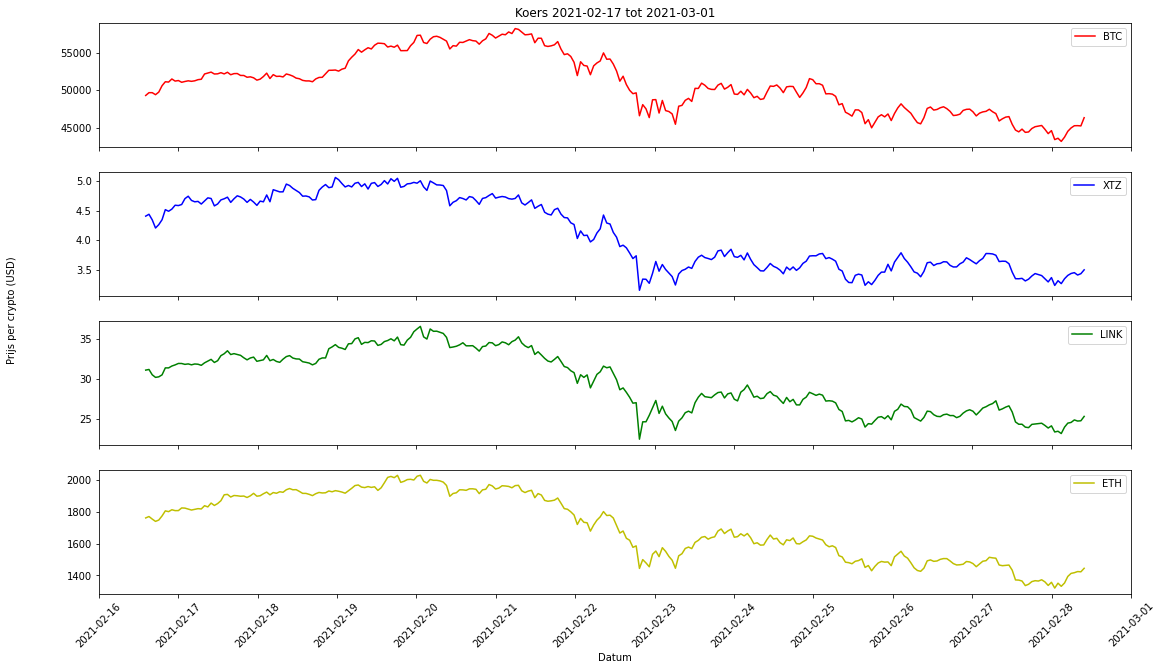

In [29]:
fig, ax = plt.subplots(4, sharex=True)

ax[0].plot(btc.Date, btc.Close, label = "BTC", color='r')
ax[1].plot(xtz.Date, xtz.Close, label = "XTZ", color='b')
ax[2].plot(link.Date, link.Close, label = "LINK", color='g')
ax[3].plot(eth.Date, eth.Close, label = "ETH", color='y')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[2].legend(loc="upper right")
ax[3].legend(loc="upper right")

plt.xticks(rotation=45)
ax[0].set_title('Koers 2021-02-17 tot 2021-03-01')
fig.text(0.06, 0.5, 'Prijs per crypto (USD)', ha='center', va='center', rotation='vertical')
plt.xlabel('Datum')

ax[3].xaxis.set_major_locator(ticker.LinearLocator(14))

fig.set_size_inches(18.5, 10.5)
plt.show()



Met de functie pct_change() kunnen wij de verandering van de prijs inzien in percentages. Omdat deze functie niet uitgevoerd kan worden met een datum colum in de dataset, halen we deze er eerst uit. Dan voeren we de pct_change() functie uit op de colom "Date".
Hierna voegen we de datum column en de groei colum weer samen met de concat() functie. Daarna zetten we de index weer opnieuw naar de datum column. Dit herhalen we voor de verschillende cryptos.

In [31]:
# Haal de datum column weg.
btc.drop(columns='Date')
# Maak een nieuw df met alleen de "close" waardes.
btc_without_date = btc[['Close']]
# Op dit df voeren we pct_change(), dit geeft de 
btc_growth_only = btc_without_date.pct_change()
btc_growth = pd.concat([btc['Date'], btc_growth_only], axis = 1)
btc_growth.set_index('Date')

eth.drop(columns='Date')
eth_without_date = eth[['Close']]
eth_growth_only = eth_without_date.pct_change()
eth_growth = pd.concat([eth['Date'], eth_growth_only], axis = 1)
eth_growth.set_index('Date')

xtz.drop(columns='Date')
xtz_without_date = xtz[['Close']]
xtz_growth_only = xtz_without_date.pct_change()
xtz_growth = pd.concat([xtz['Date'], xtz_growth_only], axis = 1)
xtz_growth.set_index('Date')

link.drop(columns='Date')
link_without_date = link[['Close']]
link_growth_only = link_without_date.pct_change()
link_growth = pd.concat([link['Date'], link_growth_only], axis = 1)
link_growth.set_index('Date')

,Close
Date,
2021-03-01 00:00:00,NaN
2021-02-28 23:00:00,-0.021567
2021-02-28 22:00:00,-0.001352
2021-02-28 21:00:00,0.005636
2021-02-28 20:00:00,-0.012585
...,...
2021-02-17 05:00:00,-0.008125
2021-02-17 04:00:00,-0.002209
2021-02-17 03:00:00,0.010664


Hoe minder volume in een coin zit, hoe volatieler de coin is.

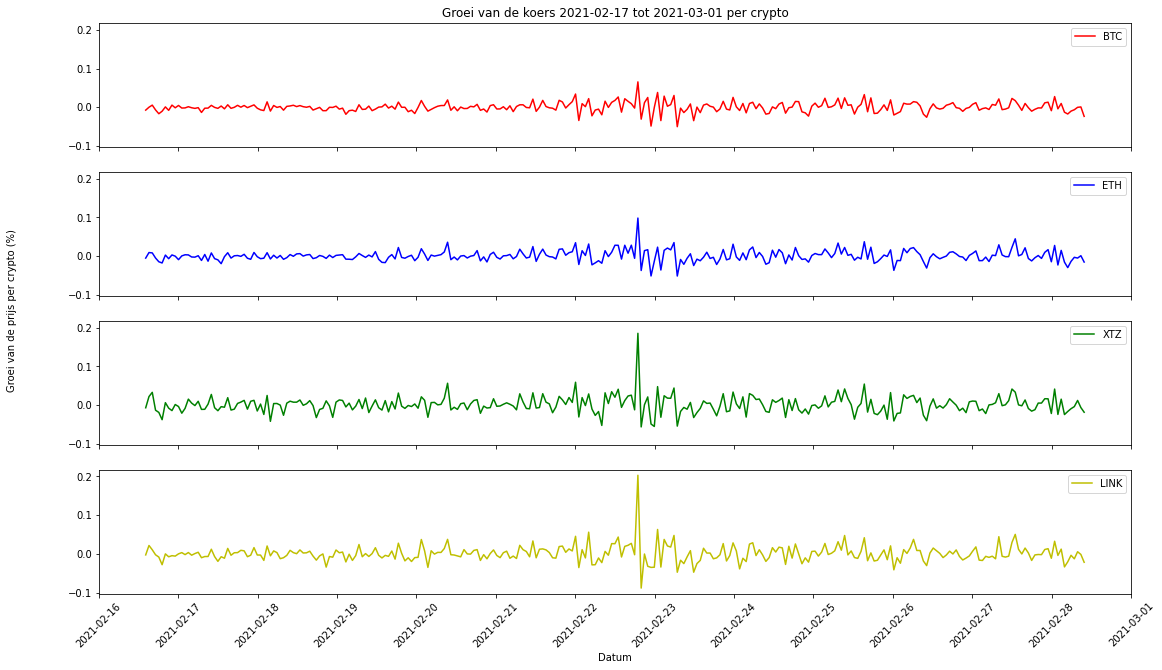

In [33]:
fig, ax = plt.subplots(4, sharex=True, sharey=True)

ax[0].plot(btc_growth.Date, btc_growth.Close, label = "BTC", color='r')
ax[1].plot(eth_growth.Date, eth_growth.Close, label = "ETH", color='b')
ax[2].plot(xtz_growth.Date, xtz_growth.Close, label = "XTZ", color='g')
ax[3].plot(link_growth.Date, link_growth.Close, label = "LINK", color='y')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[2].legend(loc="upper right")
ax[3].legend(loc="upper right")

plt.xticks(rotation=45)
ax[0].set_title('Groei van de koers 2021-02-17 tot 2021-03-01 per crypto')
fig.text(0.06, 0.5, 'Groei van de prijs per crypto (%)', ha='center', va='center', rotation='vertical')
plt.xlabel('Datum')

ax[3].xaxis.set_major_locator(ticker.LinearLocator(14))

fig.set_size_inches(18.5, 10.5)

plt.show()

# btc["Growth"] = btc.pct_change()

In [34]:
closing = pd.DataFrame({'Date': btc.Date,
                        'BTC': btc.Close,
                        'ETH': eth.Close,
                        'XTZ': xtz.Close,
                        'LINK': link.Close,
                    })

closing.set_index('Date', inplace=True)

closing.head()


open = pd.DataFrame({'BTC': btc.Open,
                        'ETH': eth.Open,
                        'XTZ': xtz.Open,
                        'LINK': link.Open,
                    })
open.head()
open.set_index(btc.Date)

open.head()

high = pd.DataFrame({'BTC': btc.High,
                        'ETH': eth.High,
                        'XTZ': xtz.High,
                        'LINK': link.High,
                    })
high.head()
high.set_index(btc.Date)

high.describe()

low = pd.DataFrame({'BTC': btc.Low,
                        'ETH': eth.Low,
                        'XTZ': xtz.Low,
                        'LINK': link.Low,
                    })
low.head()
low.set_index(btc.Date)

low.describe()

,BTC,ETH,XTZ,LINK
count,288.000000,288.000000,288.000000,288.000000
mean,50410.911076,1690.425729,4.050767,29.159711
std,3935.073583,211.522085,0.609131,3.877607
min,43016.000000,1292.760000,2.920000,21.000000
25%,46855.745000,1489.655000,3.483850,25.479765
50%,50378.305000,1670.970000,3.875700,28.517350
75%,53153.170000,1905.740000,4.641800,32.574162
max,57966.280000,2023.110000,4.991600,36.201610


Functie voor het maken van een graph op basis van de checkboxes hieronder

In [36]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


def showGraph(BTC_B,ETH_B,LINK_B,XTZ_B):
    
    t = closing.index
    BTC = closing["BTC"]
    ETH = closing["ETH"]
    LINK = closing["LINK"]
    XTZ = closing["XTZ"]

    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=3)

    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    offset = 60
    host.set_xlabel("Datum")

    
    if BTC_B is True:
        host.set_ylabel("Bitcoin Prijs (USD)")
        p1, = host.plot(t, BTC, label="Bitcoin")
        host.axis["left"].label.set_color(p1.get_color())
        
    if ETH_B is True:
        new_fixed_axis = par1.get_grid_helper().new_fixed_axis
        par1.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par1,
                                        offset=(0, 0))
        par1.axis["right"].toggle(all=True)
        par1.set_ylabel("Etherium Prijs (USD)")
        p2, = par1.plot(t, ETH, label="Etherium")
        par1.axis["right"].label.set_color(p2.get_color())
        
    else:
        
        new_fixed_axis = par1.get_grid_helper().new_fixed_axis
        par1.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par1,
                                        offset=(0, 0))
        par1.axis["right"].toggle(all=False)
        
        
    if LINK_B is True:
        new_fixed_axis1 = par2.get_grid_helper().new_fixed_axis
        par2.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par2,
                                        offset=(offset, 0))
        par2.axis["right"].toggle(all=True)
        par2.set_ylabel("Link Prijs (USD)")
        p3, = par2.plot(t, LINK, label="LINK")
        par2.axis["right"].label.set_color(p3.get_color())
        
    else:
        
        new_fixed_axis1 = par2.get_grid_helper().new_fixed_axis
        par2.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par2,
                                        offset=(offset, 0))
        par2.axis["right"].toggle(all=False)
        
    if XTZ_B is True:
        new_fixed_axis2 = par3.get_grid_helper().new_fixed_axis
        par3.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par3,
                                        offset=(offset*2, 0))
        par3.axis["right"].toggle(all=True)
        par3.set_ylabel("XTZ Prijs (USD)")
        p4, = par3.plot(t, XTZ, label="XTZ")
        par3.axis["right"].label.set_color(p4.get_color())
        
    else:
        
        new_fixed_axis2 = par3.get_grid_helper().new_fixed_axis
        par3.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par3,
                                        offset=(offset*2, 0))
        par3.axis["right"].toggle(all=False)
        

    host.legend()
    
    host.axis["top"].toggle(all=False)

    host.axis["bottom"].toggle(all=True)

    host.axis['bottom'].major_ticklabels.set_axis_direction('left')

    plt.draw()
    plt.title("Vergelijking crypto koersen geschaald naar proportie met extra y-assen")

    plt.show()

Check de boxes aan waarvan je de crypto koers wilt zien en klik op de knop om een nieuwe grafiek te maken

In [37]:
import ipywidgets as widgets
from IPython.display import display

data = ["BTC", "ETH", "LINK", "XTZ"]
checkboxes = [widgets.Checkbox(value=False, description=label) for label in data]
output = widgets.VBox(children=checkboxes)
display(output)

checkboxes[0].value =True
checkboxes[0].disabled =True

button = widgets.Button(description="Maak grafiek")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    BTC = checkboxes[0].value
    ETH = checkboxes[1].value
    LINK = checkboxes[2].value
    XTZ = checkboxes[3].value
    with output:
        showGraph(BTC, ETH, LINK, XTZ)

button.on_click(on_button_clicked)

Button(description='Maak grafiek', style=ButtonStyle())

Output()